In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
filepath = 'G:\\Mes Documents\\Documents\\Python\\Udemy-Python-for-Machine-Learning-and-Data-Science-Masterclass\\Notes\\08-Linear-Regression-Models'

In [3]:
df = pd.read_csv(filepath+'\\Advertising.csv')

In [6]:
X = df.drop('sales',axis=1)
y = df['sales']

In [8]:
from sklearn.preprocessing import PolynomialFeatures

In [10]:
polynomial_converter = PolynomialFeatures(degree=2,interaction_only=False,include_bias=False)

In [11]:
polynomial_converter.fit(X)

PolynomialFeatures(include_bias=False)

In [13]:
polynomial_converter.transform(X)

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]])

In [15]:
poly_features = polynomial_converter.transform(X)

In [16]:
poly_features

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]])

In [18]:
poly_features.shape

(200, 9)

In [19]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(poly_features,y,test_size=0.3,random_state=101)

In [24]:
from sklearn.linear_model import LinearRegression

In [27]:
model = LinearRegression()

In [29]:
model.fit(X_train,y_train)

LinearRegression()

In [30]:
test_predictions = model.predict(X_test)

In [31]:
model.coef_

array([ 5.17095811e-02,  1.30848864e-02,  1.20000085e-02, -1.10892474e-04,
        1.14212673e-03, -5.24100082e-05,  3.34919737e-05,  1.46380310e-04,
       -3.04715806e-05])

In [32]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [33]:
MAE = mean_absolute_error(y_test,test_predictions)

In [35]:
MSE = mean_squared_error(y_test,test_predictions)

In [39]:
RMSE = np.sqrt(mean_squared_error(y_test,test_predictions))

In [36]:
MAE

0.4896798044803855

In [37]:
MSE

0.4417505510403794

In [40]:
RMSE

0.6646431757269305

In [41]:
# create different order poly
# split poly feat train/test
# fit on train
# store/save RMSE for both train and test !!
# Plot erreor vs poly degree

In [42]:
train_rmse_errors = []
test_rmse_errors = []

for degree in range(1,10):
    poly_converter = PolynomialFeatures(degree=degree,include_bias=False)
    poly_features = poly_converter.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(poly_features,y,test_size=0.3,random_state=101)
    
    model = LinearRegression()
    model.fit(X_train,y_train)
    
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    train_rmse = np.sqrt(mean_squared_error(y_train,train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test,test_pred))
    
    train_rmse_errors.append(train_rmse)
    test_rmse_errors.append(test_rmse)

In [43]:
train_rmse_errors

[1.7345941243293759,
 0.5879574085292231,
 0.4339344356902069,
 0.3517083688399347,
 0.2509342952029336,
 0.1994066052079892,
 5.421421599418184,
 0.14254199025637196,
 0.16652097503889574]

In [44]:
test_rmse_errors

[1.5161519375993877,
 0.6646431757269305,
 0.5803286825177236,
 0.5077742624665287,
 2.5758247603435955,
 4.490840128985558,
 1381.404235838588,
 4449.5672832934115,
 95891.23715510336]

(0.0, 5.0)

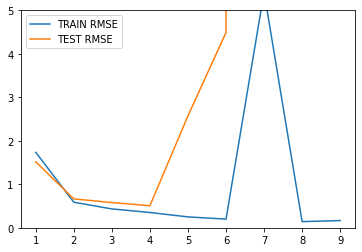

In [51]:
plt.plot(range(1,10),train_rmse_errors,label='TRAIN RMSE')
plt.plot(range(1,10),test_rmse_errors,label='TEST RMSE')
plt.legend()
plt.ylim({0,5})

In [52]:
final_poly_converter = PolynomialFeatures(degree=3,include_bias=False)

In [53]:

final_model = LinearRegression()

In [54]:
full_converted_X = final_poly_converter.fit_transform(X)

In [55]:
final_model.fit(full_converted_X,y)

LinearRegression()

In [56]:
from joblib import dump,load

In [57]:
dump(final_model,'final_poly_model.joblib')

['final_poly_model.joblib']

In [58]:
dump(final_poly_converter,'final_converter.joblib')

['final_converter.joblib']

In [59]:
loaded_converter=load('final_converter.joblib')
loaded_model=load('final_poly_model.joblib')

In [60]:
campaign=[[149,22,12]]

In [61]:
transformed_data = loaded_converter.fit_transform(campaign)

In [64]:
loaded_model.predict(transformed_data)

array([14.64501014])